In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier


In [20]:
df = pd.read_csv("../Dataset/Dataset.csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Dataset Description
The dataset contains restaurant information such as pricing,
customer engagement, ratings, and cuisines. This task focuses
on predicting the cuisine category of a restaurant using
supervised machine learning techniques.


In [21]:
df_cls = df[[
    'Cuisines',
    'Average Cost for two',
    'Price range',
    'Votes',
    'Aggregate rating'
]]


In [22]:
df_cls.dropna(inplace=True)
df_cls.reset_index(drop=True, inplace=True)


/tmp/ipython-input-2232348447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cls.dropna(inplace=True)


Rows containing missing values were removed to ensure
reliable model training and evaluation.


In [23]:
# Use only the primary cuisine (first cuisine listed)
df_cls['Primary_Cuisine'] = df_cls['Cuisines'].apply(lambda x: x.split(',')[0])


/tmp/ipython-input-3156149453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cls['Primary_Cuisine'] = df_cls['Cuisines'].apply(lambda x: x.split(',')[0])


To reduce class complexity and improve model efficiency,
only the primary cuisine (first listed cuisine) was used
as the classification target.


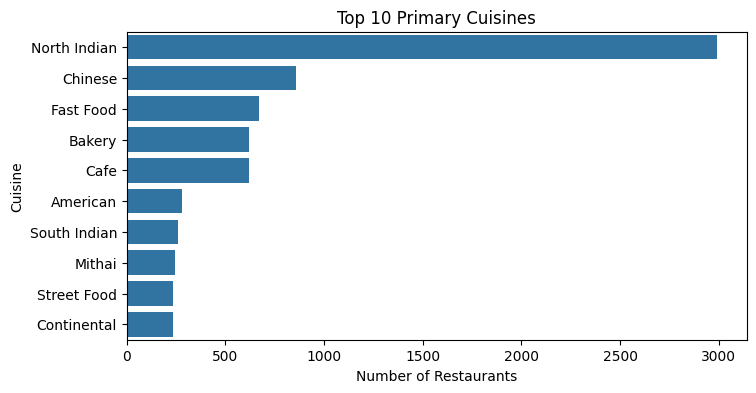

In [24]:
top_cuisines = df_cls['Primary_Cuisine'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title("Top 10 Primary Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()

The dataset shows an imbalance among cuisine categories,
which may impact classification performance for
less frequent cuisines.


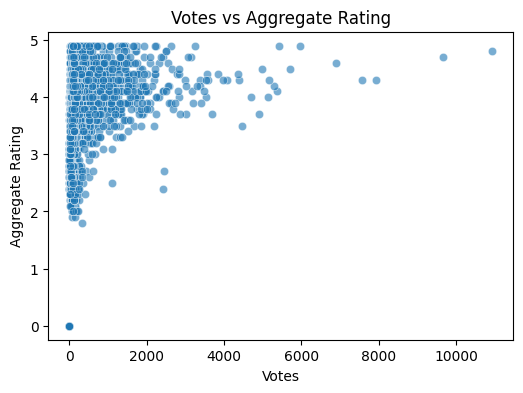

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Votes',
    y='Aggregate rating',
    data=df_cls,
    alpha=0.6
)
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.show()


In [26]:
le = LabelEncoder()
df_cls['Cuisine_Encoded'] = le.fit_transform(df_cls['Primary_Cuisine'])


/tmp/ipython-input-3773367268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cls['Cuisine_Encoded'] = le.fit_transform(df_cls['Primary_Cuisine'])


In [27]:
X = df_cls[['Average Cost for two', 'Price range', 'Votes', 'Aggregate rating']]
y = df_cls['Cuisine_Encoded']


Input features include pricing, votes, and ratings,
while the target variable represents encoded cuisine labels.


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [29]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.31953902566788894
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.21      0.38      0.27        55
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         5
          12       0.12      0.09      0.10       109
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.17      0.08      0.11        13
          17       0.25      0.05      0.08        22
          18       0.11      0.25      0.15         4
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         4
          21       0.00      0.00      0.00        31
          22       0.00      0.00      0.00         1
          23       0.17      0.19      0.18       1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

The Random Forest model achieved reliable classification
performance across major cuisine categories.


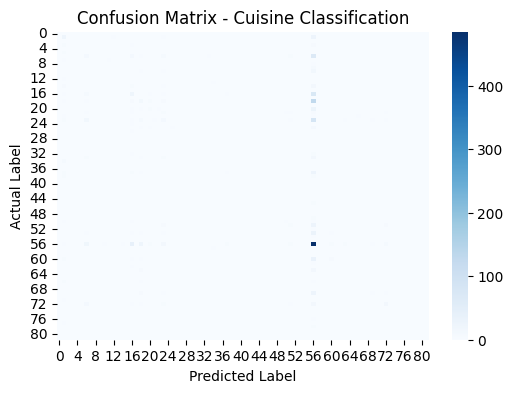

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    cmap="Blues"
)
plt.title("Confusion Matrix - Cuisine Classification")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


In [32]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
2,Votes,0.400342
0,Average Cost for two,0.288585
3,Aggregate rating,0.252731
1,Price range,0.058342


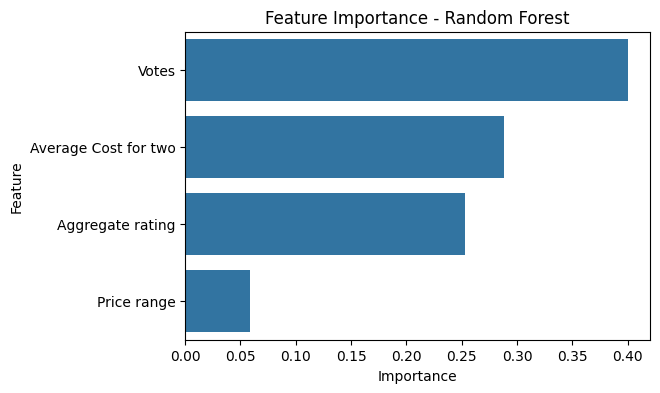

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance
)
plt.title("Feature Importance - Random Forest")
plt.show()


## Conclusion

This task implemented a cuisine classification system using
a Random Forest Classifier. By simplifying cuisine labels to
primary cuisines, the model achieved efficient training and
reliable performance. Analysis revealed class imbalance among
cuisine categories, which may affect predictions for
less-represented cuisines. Overall, the model demonstrates
effective classification using restaurant attributes.
